# PCAによるEDAと特徴量作成

In [32]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold, TimeSeriesSplit



X = pd.DataFrame([a for a in range(10)],[b for b in range(10)])
y = [a for a in range(10)]

In [42]:
split = []
folds = TimeSeriesSplit(n_splits=3)
for X_index, y_index in folds.split(X):
    print(type(X_index))
    

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
np.arange(10), np.arange(10, 20) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

In [13]:
a = ['id_29', 'V252', 'C12_valid', 'C14_valid', 'C8_valid', 'V194', 'id_35', 'C11_valid', 'V328', 'V330',
                 'id_08', 'V302', 'V196', 'V193', 'R_emaildomain_suffix', 'V195', 'C9_valid', 'V191', 'V110', 'id_22',
                 'V334', 'id_24', 'id_25', 'V112', 'V111', 'V116', 'id_26', 'C4_valid', 'V41', 'V14', 'C5_valid',
                 'V138', 'V325', 'C7_valid', 'C6_valid', 'V269', 'V27', 'V113', 'V114', 'V305', 'addr2', 'V241', 'V65',
                 'V28', 'V68', 'id_23', 'V89', 'V117', 'V122', 'V88', 'V121', 'V120', 'V119', 'V118',
                 'V240', 'id_27', 'C3_valid']

In [14]:
b = ['id_29', 'V193', 'C10_valid', 'id_21', 'C2_valid', 'C12_valid', 'R_emaildomain_suffix', 'V302', 'V109', 'id_35', 'V328', 'V116', 'C8_valid', 'V138', 'id_26', 'id_36_count_dist', 'V334', 'V196', 'V194', 'C5_valid', 'C9_valid', 'V1', 'V195', 'id_24', 'id_25', 'V111', 'V112', 'V110', 'C4_valid', 'C7_valid', 'V269', 'V14', 'V191', 'id_23', 'V41', 'V325', 'addr2', 'V89', 'C6_valid', 'V114', 'V88', 'V27', 'V28', 'V68', 'id_27', 'V113', 'V65', 'V240', 'V241', 'id_22', 'C3_valid', 'V117', 'V118', 'V120', 'V121', 'V122', 'V305', 'V119']


In [ ]:
 'V241', 'id_22', 'C3_valid', 'V117', 'V118', 'V120', 'V121', 'V122', 'V305', 'V119']


In [16]:
list(set(a)-set(b))

['id_08', 'V252', 'C11_valid', 'V330', 'C14_valid']

In [6]:
list_drop = ['uid2_TransactionAmt_std', 'TransactionAmt_to_std_card1', 'TransactionAmt_to_mean_card1', 'addr1__card1', 'uid2_TransactionAmt_mean', 'Loguid2_TransactionAmt_std', 'card2__dist1', 'card2_count_full', 'TransactionAmt_to_std_card4', 'TransactionAmt_to_mean_card4', 'card1__card5', 'TransactionAmt', 'card2', 'card2_TransactionAmt_std', 'card2_TransactionAmt_mean', 'P_emaildomain__C2', 'card1_TransactionAmt_std', 'addr1', 'card5__P_emaildomain', 'uid_TransactionAmt_std', 'card1_TransactionAmt_mean', 'Loguid2_TransactionAmt_mean', 'D4', 'addr1_TransactionAmt_mean', 'D2', 'uid_TransactionAmt_mean', 'dist1', 'addr1_count_full', 'addr1_TransactionAmt_std', 'D10', 'D15_to_mean_card1', 'card2__id_20', 'D15_to_std_card1', 'TransactionAmt_decimal', 'C13', 'Logcard2_TransactionAmt_mean', 'D15_to_mean_addr1', 'Logcard1_TransactionAmt_std', 'TransactionAmt_Log', 'Loguid_TransactionAmt_std', 'Logcard2_TransactionAmt_std', 'Logaddr1_TransactionAmt_mean', 'D15_to_mean_card4', 'D15', 'C_sum', 'C13_count_full', 'D3', 'Logaddr1_TransactionAmt_std', 'D1', 'Logcard1_TransactionAmt_mean', 'D5', 'DeviceInfo__P_emaildomain', 'P_emaildomain_count_full', 'D15_to_std_addr1', 'D11', 'D11__DeviceInfo', 'Loguid_TransactionAmt_mean', 'D15_to_std_card4', 'D1_count_full', 'id_02_to_std_card1', 'D2_count_full', 'dist1_count_full', 'D4_count_full', 'id_02_to_mean_card1', 'V307', 'id_02', 'P_emaildomain', 'id_02_to_mean_card4', 'V310', 'D8', 'id_02_to_std_card4', 'C1', 'id_20', 'id_02__id_20', 'C1_count_full', 'C2', 'D3_count_full', 'C14_count_full', 'card5_TransactionAmt_std', 'card5_TransactionAmt_mean', 'id_19', 'C14', 'id_31_count_dist', 'card5', 'card5_count_full', 'V127', 'C2_count_full', 'C6_count_full', 'C6', 'D5_count_full', 'local_hour', 'id_31', 'C_null', 'id_06', 'C9_count_full', 'M4', 'V130', 'id_02__D8', 'M5', 'C11', 'screen_height', 'D9', 'C9', 'M6', 'id_05', 'Logcard5_TransactionAmt_std', 'D8_count_full', 'C11_count_full', 'V308', 'dist2', 'P_emaildomain_1', 'M_sum', 'screen_width', 'Logcard5_TransactionAmt_mean', 'R_emaildomain_count_full', 'V314', 'V313', 'version_id_31', 'DeviceInfo', 'V315', 'id_01', 'R_emaildomain', 'V312', 'C5', 'D9_count_full', 'P_emaildomain_bin', 'id_33_count_dist', 'R_emaildomain_1', 'ProductCD', 'V128', 'D14', 'V285', 'V45', 'V36', 'C5_count_full', 'version_id_30', 'V62', 'V317', 'V35', 'V83', 'V75', 'id_01_count_dist', 'id_33', 'V54', 'V306', 'id_30', 'V53', 'V76', 'V13', 'V12', 'device_name', 'V38', 'V264', 'V87', 'dist2_count_full', 'V96', 'V82', 'D6', 'M_na', 'card4', 'M3', 'id_13', 'V131', 'V61', 'D12', 'id_38', 'device_version', 'V5', 'V48', 'V283', 'V49', 'V20', 'V78', 'V99', 'V70', 'M8', 'V19', 'V265', 'V4', 'V203', 'V44', 'V165', 'V37', 'V258', 'V294', 'M7', 'V126', 'local_hour_dist', 'card4_count_full', 'V90', 'id_18', 'V67', 'V69', 'V133', 'V263', 'V30', 'V91', 'D13', 'V29', 'C12', 'V282', 'C8', 'V318', 'id_09', 'id_14', 'V280', 'V221', 'V164', 'V316', 'card6', 'V11', 'P_emaildomain_2', 'V267', 'M9', 'V291', 'V86', 'V10', 'C10', 'V320', 'card3_count_full', 'V309', 'D7', 'card6_TransactionAmt_mean', 'id_03', 'V222', 'V281', 'V274', 'V204', 'V77', 'C8_count_full', 'V47', 'V136', 'V56', 'C12_count_full', 'V202', 'browser_id_31', 'V143', 'V218', 'card3_TransactionAmt_mean', 'R_emaildomain_bin', 'V160', 'card6_count_full', 'D6_count_full', 'V24', 'V152', 'C10_count_full', 'V55', 'V332', 'V311', 'V52', 'V7', 'V261', 'V275', 'DeviceType', 'C4', 'V245', 'M2', 'V268', 'card6_TransactionAmt_std', 'V279', 'V156', 'V97', 'V266', 'V166', 'V296', 'V3', 'V139', 'V149', 'V273', 'V189', 'V277', 'V243', 'V145', 'V134', 'V209', 'V271', 'id_11', 'id_17', 'V40', 'V212', 'V23', 'V229', 'V207', 'V102', 'V66', 'V293', 'V270', 'V257', 'V74', 'V150', 'V217', 'V140', 'V159', 'V43', 'V259', 'V323', 'V272', 'id_15', 'V170', 'V219', 'V201', 'V129', 'V208', 'V287', 'V224', 'Logcard3_TransactionAmt_mean', 'V64', 'V187', 'V262', 'V211', 'C4_count_full', 'V213', 'V289', 'V333', 'V51', 'V295', 'V171', 'V215', 'V39', 'V2', 'V292', 'V232', 'V321', 'V132', 'card3_TransactionAmt_std', 'V144', 'V230', 'V6', 'V276', 'V124', 'V278', 'V210', 'V168', 'V137', 'card3', 'Logcard6_TransactionAmt_mean', 'C7', 'V42', 'id_32', 'V234', 'V58', 'V260', 'V167', 'P_emaildomain_3', 'V151', 'V244', 'V298', 'V228', 'V169', 'V251', 'P_emaildomain_suffix', 'V324', 'D7_count_full', 'V81', 'V233', 'V223', 'V100', 'V331', 'V205', 'V46', 'V9', 'V246', 'V95', 'V135', 'C7_count_full', 'V26', 'V200', 'V220', 'V178', 'Logcard6_TransactionAmt_std', 'V225', 'V256', 'V33', 'id_04', 'V231', 'V60', 'id_37', 'V25', 'V319', 'Logcard3_TransactionAmt_std', 'V206', 'V216', 'V63', 'V162', 'V288', 'V214', 'V253', 'V177', 'V34', 'V290', 'id_34', 'R_emaildomain_2', 'V286', 'V161', 'V73', 'V79', 'V105', 'V103', 'V179', 'V250', 'V94', 'V239', 'V176', 'V163', 'V59', 'V148', 'V154', 'V85', 'V72', 'V80', 'V335', 'V155', 'V248', 'id_16', 'V199', 'V180', 'V242', 'V322', 'V255', 'V284', 'V50', 'V188', 'OS_id_30', 'V15', 'V338', 'V190', 'V235', 'id_10', 'V57', 'V236', 'V226', 'V147', 'V71', 'V16', 'V336', 'V158', 'V153', 'V93', 'V238', 'V182', 'C13_valid', 'V125', 'V172', 'id_07', 'V17', 'C1_valid', 'V8', 'V101', 'V18', 'V98', 'V339', 'V301', 'V237', 'V173', 'V92', 'V227', 'V157', 'V300', 'C3_count_full', 'V175', 'V141', 'V123', 'V22', 'V174', 'V84', 'id_28', 'V303', 'V184', 'V299', 'V146', 'M1', 'V185', 'V142', 'V181', 'C3', 'V326', 'V337', 'V254', 'R_emaildomain_3', 'addr2_TransactionAmt_std', 'V21', 'V106', 'V32', 'V31', 'V115', 'addr2_TransactionAmt_mean', 'V186', 'V329', 'V297', 'V198', 'C10_valid', 'V304', 'V108', 'V104', 'addr2_count_full', 'Logaddr2_TransactionAmt_std', 'V183', 'V192', 'id_36', 'V327', 'V249', 'id_36_count_full', 'V109', 'id_21', 'id_12', 'V1', 'C2_valid', 'V197', 'id_36_count_dist', 'Logaddr2_TransactionAmt_mean', 'V247', 'id_29', 'V252', 'C12_valid', 'C14_valid', 'C8_valid', 'V194', 'id_35', 'C11_valid', 'V328', 'V330', 'id_08', 'V302', 'V196', 'V193', 'R_emaildomain_suffix', 'V195', 'C9_valid', 'V191', 'V110', 'id_22', 'V334', 'id_24', 'id_25', 'V112', 'V111', 'V116', 'id_26', 'C4_valid', 'V41', 'V14', 'C5_valid', 'V138', 'V325', 'C7_valid', 'C6_valid', 'V269', 'V27', 'V113', 'V114', 'V305', 'addr2', 'V241', 'V65', 'V28', 'V68', 'id_23', 'V89', 'V117', 'V122', 'V88', 'V121', 'V120', 'V119', 'V118', 'V240', 'id_27', 'C3_valid']
len(list_drop)

568

In [5]:
import time
import math
t1 = time.time()
time.sleep(10)
t2 = time.time()

math.floor(t2 - t1)

10

In [2]:
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import gc

sys.path.append('/tmp/working/IEEE_Fraud_Detection/')
folder_path = '/tmp/working/IEEE_Fraud_Detection/data/input/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')

# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
del train_identity, train_transaction, test_identity, test_transaction

print('train shape: ', train.shape)
print('test shape: ', test.shape)

gc.collect()

train shape:  (590540, 434)
test shape:  (506691, 433)


56

In [4]:
# 数値カラムの選択
numeric_columns = list(train.describe().columns.values)
numeric_columns.remove('TransactionID')
numeric_columns.remove('isFraud')
numeric_columns.remove('TransactionDT')

train_numeric = train[numeric_columns]
test_numeric = test[numeric_columns]
print('train_numeric shape: ', train_numeric.shape)
print('test_numeric shape: ', test_numeric.shape)

display(train_numeric.head())
display(test_numeric.head())

train_numeric shape:  (590540, 400)
test_numeric shape:  (506691, 400)


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,-480.0,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,31.95,10409,111.0,150.0,226.0,170.0,87.0,1.0,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.00,4272,111.0,150.0,226.0,299.0,87.0,4.0,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,171.00,4476,574.0,150.0,226.0,472.0,87.0,2635.0,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,97.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,284.95,10989,360.0,150.0,166.0,205.0,87.0,17.0,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,NaN,NaN,NaN,242.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67.95,18018,452.0,150.0,117.0,264.0,87.0,6.0,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 標準化、欠損値を最頻値で埋める
sc = StandardScaler()
train_numeric_std = pd.DataFrame(sc.fit_transform(train_numeric), columns=train_numeric.columns)
train_numeric_std = train_numeric_std.fillna(train_numeric_std.median())

# testデータは、trainデータを元に標準化と欠損値処理を行う。
test_numeric_std = pd.DataFrame(sc.transform(test_numeric), columns=test_numeric.columns)
test_numeric_std = test_numeric_std.fillna(train_numeric_std.median())

display(train_numeric_std.head())
display(test_numeric_std.head())

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,-0.278167,0.821695,-0.009858,-0.281828,-1.388767,0.238510,0.074098,-0.267572,-0.368314,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053939,-0.208712,-0.054826,-0.087363,-0.047034,-0.243806,-0.147247,-0.509625,-0.409232,-0.245948,-0.596570,-0.363326,-0.485881,-0.417467,-0.466986,0.33328,-0.607738,-0.718232,-0.434827,-0.264758,-0.423475,-0.807712,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.447670,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.67120
1,-0.443327,-1.457558,0.262651,-0.281828,-2.358595,0.336798,0.074098,-0.297152,-0.368314,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053939,-0.268682,-0.054826,-0.097964,-0.047034,-0.243806,-0.147247,-0.598423,-0.409232,-0.326096,-0.732627,-0.363326,-0.485881,-0.417467,-0.466986,0.33328,-0.678926,-0.556978,-0.434827,-0.264758,-0.423475,-0.807712,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.447670,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.67120
2,-0.317889,-1.068263,0.807668,-0.281828,-0.806870,0.385943,0.074098,0.453108,-0.368314,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053939,-0.208712,-0.054826,-0.097964,-0.047034,-0.243806,-0.147247,-0.598423,-0.409232,-0.326096,-0.732627,-0.363326,-0.485881,-0.417467,-0.466986,0.33328,-0.678926,0.905055,-0.434827,-0.264758,-0.423475,0.746106,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.447670,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.67120
3,-0.355521,1.679858,1.295649,-0.281828,-1.994910,1.820960,0.074098,-0.297152,-0.368314,-0.090533,-0.066398,-0.037493,-0.059438,-0.21606,-0.070916,-0.046146,-0.053939,-0.208712,-0.054826,-0.097964,-0.047034,-0.058284,-0.147247,0.111965,-0.324637,-0.454332,-0.240729,-0.475685,-0.485881,-0.417467,-0.466986,0.33328,-0.218942,-0.556978,-0.434827,-0.264758,-0.423475,-0.260176,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.447670,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.67120
4,-0.355521,-1.102133,0.959766,-0.281828,-2.358595,1.270542,0.074098,-0.297152,-0.368314,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.043454,-0.268682,-0.044364,-0.097964,-0.047034,-0.243806,-0.147247,-0.598423,-0.409232,-0.326096,-0.596570,-0.363326,-0.485881,-0.417467,-0.466986,0.33328,-0.596786,-0.556978,-0.434827,-0.264758,-0.423475,-0.551209,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,-0.430993,0.104111,-1.594211,-0.281828,0.647872,-1.186678,0.074098,-0.315975,-0.368314,-0.060586,-0.059933,-0.037493,-0.059438,-0.099722,-0.070916,-0.046146,-0.053939,0.091141,-0.054826,-0.055562,-0.035495,0.637423,-0.046327,2.059190,1.406739,-0.021533,1.350090,-0.172314,-0.485881,-0.417467,-0.466986,0.33328,1.610042,0.303041,-0.434827,-0.264758,-0.423475,1.209785,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.44767,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.6712
1,-0.359702,-1.148040,-1.594211,-0.281828,0.647872,0.081248,0.074098,-0.307908,-0.368314,-0.083047,-0.085795,-0.037493,-0.059438,-0.216060,-0.112869,-0.046146,-0.053939,-0.148741,-0.054826,-0.097964,-0.035495,-0.158775,-0.127063,0.346647,-0.115970,-0.342125,2.585068,-0.397033,-0.485881,-0.417467,-0.466986,0.33328,0.586030,2.619719,-0.434827,-0.264758,-0.423475,2.319655,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.44767,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.6712
2,0.150412,-1.106417,1.340011,-0.281828,0.647872,1.781644,0.074098,6.767121,-0.368314,-0.090533,-0.085795,-0.037493,-0.059438,-0.216060,-0.056932,-0.046146,-0.053939,-0.028800,-0.054826,-0.087363,-0.047034,-0.081474,-0.127063,0.270534,-0.183646,-0.294036,-0.225030,-0.363326,-0.485881,-0.417467,-0.466986,0.33328,0.065810,-0.057092,-0.434827,-0.264758,-0.423475,-0.329235,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.44767,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.6712
3,0.626866,0.222450,-0.016195,-0.281828,-0.806870,-0.842667,0.074098,-0.272950,-0.368314,-0.068073,-0.085795,-0.037493,-0.059438,-0.177281,-0.112869,-0.046146,-0.053939,-0.148741,-0.054826,-0.087363,-0.047034,-0.197426,-0.086695,-0.332028,-0.719414,0.202881,0.533749,-0.015011,-0.485881,-0.417467,-0.466986,0.33328,0.646266,0.512671,-0.434827,-0.264758,-0.423475,0.386015,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568,0.360366,-0.306393,-0.100613,0.084076,-0.30774,0.406203,0.062781,0.176379,-0.092519,0.107952,0.225856,0.335201,0.475022,-0.772055,0.488484,-0.085958,0.44767,-0.584777,-0.290374,-0.759181,-0.088341,-0.00219,-0.6712
4,-0.280467,1.656599,0.566847,-0.281828,-1.994910,-0.262763,0.074098,-0.302530,-0.368314,-0.060586,-0.059933,-0.037493,-0.059438,-0.138501,-0.056932,-0.046146,-0.053939,0.031170,-0.054826,-0.044962,-0.047034,-0.143315,-0.046327,-0.458883,-0.832207,-0.454332,-0.617502,-0.475685,-0.485881,-0.417467,-0.466986,0.33328,-0.558454,-0.669855,-0.434827,-0.264758,-0.423475,-0.699191,0.007391,-0.188248,...,-0.122764,-0.124744,-0.192152,-0.215438,-0.217417,-0.21314,-0.149714,-0.164104,-0.116088,-0.12317

In [6]:
# PCAのインスタンス化、fitとtransform
pca = PCA()

train_pca_features = pca.fit_transform(train_numeric_std)
train_pca = pd.DataFrame(train_pca_features, columns=["PC{}".format(x + 1) for x in range(len(train_numeric_std.columns))])

test_pca_features = pca.transform(test_numeric_std)
test_pca = pd.DataFrame(test_pca_features, columns=["PC{}".format(x + 1) for x in range(len(test_numeric_std.columns))])
 
display(train_pca.head())
display(test_pca.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC361,PC362,PC363,PC364,PC365,PC366,PC367,PC368,PC369,PC370,PC371,PC372,PC373,PC374,PC375,PC376,PC377,PC378,PC379,PC380,PC381,PC382,PC383,PC384,PC385,PC386,PC387,PC388,PC389,PC390,PC391,PC392,PC393,PC394,PC395,PC396,PC397,PC398,PC399,PC400
0,-1.073729,-1.823243,-0.639829,0.460614,1.919762,-1.893766,0.327284,0.074420,-0.316645,-0.678161,0.545233,0.271207,-0.418147,0.301034,0.667790,0.173347,0.749782,-0.674180,0.026926,-0.260661,-0.010863,0.217977,-0.218338,-0.006681,0.786743,-0.228715,-0.128933,0.233948,0.154783,0.173857,-0.125447,-0.274768,-0.036972,0.440200,0.209677,0.219611,0.129403,-1.416060,-0.002593,0.165193,...,0.000063,0.000854,0.000003,0.001608,-0.004022,-0.000502,-0.000402,0.001052,0.001324,-0.001967,0.002906,0.000132,-0.001543,-0.001384,0.002743,0.001401,0.000113,-0.000079,0.001002,-0.000565,-0.000629,-0.000796,-0.000113,0.000005,-0.000048,-0.000054,0.000048,0.000004,-4.954626e-06,0.000127,-0.000073,0.000017,-0.000014,-0.000005,7.034192e-06,-0.000001,-4.277058e-07,-0.000005,0.000008,-0.000002
1,-0.831652,-0.429170,-0.550480,-0.577861,0.609748,-1.287593,0.960423,0.282845,-0.288704,1.467172,-0.391731,0.682633,1.859495,-2.162943,-0.430504,-0.439839,-0.149581,-0.350743,0.388602,-0.415175,0.303567,-0.278476,-0.941792,-0.355532,0.775192,0.531980,-0.971736,1.317615,1.146825,0.856650,-0.527575,-0.138500,-0.144182,0.426621,-0.015448,0.120580,-0.134696,-0.299823,0.041878,-0.399761,...,0.000461,-0.000494,0.000367,-0.000235,-0.000181,0.000141,-0.000220,0.000014,0.000068,-0.000291,0.000346,0.000027,-0.000108,-0.000095,0.000884,-0.000259,-0.000056,-0.000011,-0.000049,-0.000370,0.000038,0.000022,-0.000040,0.000015,0.000032,0.000025,-0.000016,-0.000038,1.779322e-05,0.000023,-0.000026,0.000016,-0.000008,0.000014,-2.080553e-06,0.000004,-4.921735e-06,-0.000005,0.000003,-0.000001
2,-1.124709,-1.781320,-0.603011,0.510713,1.825691,-1.722328,0.043661,-0.229008,-0.076372,0.763352,0.348391,0.156103,-0.112284,0.190012,0.458723,0.069305,0.389154,-0.208940,-0.036702,0.108440,0.117276,0.277853,-0.087964,-0.275021,0.398019,-0.545673,0.306549,-0.411124,-0.436868,-0.165947,0.068893,-0.157462,0.078901,0.198872,0.312371,0.059315,-0.010703,0.451915,-0.156110,-0.077334,...,0.000411,0.000469,0.001166,0.002526,-0.001052,-0.000161,-0.000594,-0.000292,-0.000130,-0.000721,0.000421,0.000050,-0.000387,-0.000103,0.001246,-0.000157,-0.000126,0.000052,-0.000086,-0.000409,0.000214,-0.000050,-0.000065,0.000063,-0.000005,-0.000059,-0.000019,0.000009,5.178610e-07,0.000005,-0.000025,0.000017,-0.000008,0.000007,-8.159367e-07,-0.000011,-2.644653e-06,-0.000004,0.000005,-0.000003
3,1.705450,-2.727026,-0.452384,1.265470,1.895296,0.761655,2.391838,-1.109377,-1.214088,1.586006,-1.927629,-1.294998,-1.721890,1.540977,1.352547,0.177355,0.294383,1.111283,-1.001065,1.751702,-0.915023,-0.457231,-1.161343,0.383621,-0.209817,-1.094805,-0.326779,0.457187,0.693500,1.137485,0.362448,0.755799,-0.028577,0.205772,0.279954,-0.599226,0.396701,-1.868281,0.272876,1.337049,...,0.080431,-0.161059,0.027569,0.033465,0.084355,-0.142171,0.004743,-0.040840,0.015647,-0.050898,-0.042333,0.004621,0.055031,0.018420,-0.005463,-0.106014,-0.040883,0.000317,-0.095520,-0.048892,0.059846,0.044657,0.001915,0.000980,0.017942,0.017329,-0.005292,-0.000839,7.809117e-05,-0.009361,0.002347,0.001394,-0.000529,0.000158,9.751461e-05,-0.000085,-1.828955e-04,0.000025,-0.000132,-0.000055
4,-0.450949,-1.187035,-0.852142,0.841686,3.223614,-2.834737,-0.036606,0.112396,0.756916,0.690772,1.514572,-0.770432,-0.698218,2.296755,-0.970726,-0.347881,-1.063374,1.723563,0.935119,-0.464737,3.030965,0.290707,1.501779,0.292787,-1.197456,2.281228,-0.094463,2.083800,1.950126,-1.013698,2.556747,-0.271171,-0.020783,-3.168086,-0.972382,-0.448390,0.341659,-0.545961,-0.288034,0.350430,...,-0.032623,0.077001,0.011632,-0.011455,-0.019295,0.042696,-0.01

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC361,PC362,PC363,PC364,PC365,PC366,PC367,PC368,PC369,PC370,PC371,PC372,PC373,PC374,PC375,PC376,PC377,PC378,PC379,PC380,PC381,PC382,PC383,PC384,PC385,PC386,PC387,PC388,PC389,PC390,PC391,PC392,PC393,PC394,PC395,PC396,PC397,PC398,PC399,PC400
0,-1.169342,-2.358964,0.397832,-2.835108,-2.807896,-0.193662,3.102632,2.542141,-2.708325,-2.557897,-0.790630,1.199725,2.828060,-2.658634,-2.002246,0.177767,-2.030660,4.620669,0.150008,1.416889,-0.960813,0.555319,-0.434730,-1.826597,-2.532375,-1.144299,1.390637,-1.673162,-1.842804,-1.546031,0.722239,1.335542,1.463191,-1.349409,0.424606,-0.373731,0.451840,-0.248472,0.297419,-0.664199,...,-0.000101,0.001571,0.002123,0.015451,-0.003126,0.000310,-0.000573,-0.000662,-0.000954,0.000813,-0.000125,-0.000037,-0.000764,0.001786,-0.000274,0.000332,0.000334,0.000655,0.000082,0.000473,0.000916,0.000153,-0.000385,-0.000022,-0.000176,-0.000102,-0.000003,-0.000039,-0.000099,-0.000125,0.000058,-0.000008,0.000039,-0.000002,9.230000e-06,0.000021,-0.000020,-0.000001,-3.896549e-06,5.014781e-06
1,-0.671686,-2.096057,-0.243116,0.027819,0.376339,0.093424,2.152945,0.164160,-1.265245,2.556844,-1.588690,-0.196320,0.071451,0.559904,0.652225,-0.075922,-0.078719,-0.252539,-0.216549,0.412598,0.132478,0.337578,0.376767,0.032353,-0.569633,-0.951420,0.897098,-1.091165,-0.976273,-0.240007,0.404101,0.434285,0.208271,-0.376871,0.617308,-0.243480,0.219585,0.575512,0.110017,-0.494676,...,0.000643,0.000465,0.003196,0.001471,0.000409,0.003124,-0.000554,0.000395,0.000596,0.000589,0.000118,-0.000123,0.000682,0.002192,-0.008191,0.000845,0.000315,-0.000200,0.000638,0.000141,0.000426,0.000044,-0.000210,0.000052,-0.000147,-0.000106,-0.000002,0.000041,0.000036,0.000009,-0.000008,0.000021,0.000020,-0.000019,-4.143930e-07,-0.000004,-0.000005,0.000002,-5.653294e-07,2.551446e-06
2,-0.116686,-1.926895,-0.413279,1.702877,0.869752,-0.460388,1.042002,-0.106005,-0.749477,2.394438,-0.532955,0.796497,-1.536887,-0.007163,0.405106,0.073915,0.536899,0.996082,-0.129192,0.341580,-0.639526,-0.579126,-0.009902,-0.591784,-0.092995,-0.137527,-0.203150,-1.467283,-1.071819,1.856806,1.097770,0.247910,1.208699,0.258941,-0.936549,-0.296894,-1.264923,1.895705,1.000762,1.894299,...,-0.006553,0.008236,-0.004520,-0.006115,0.002214,-0.000754,-0.001975,-0.001620,-0.019349,0.000533,-0.004741,-0.000306,-0.000054,0.002102,-0.006879,0.001479,0.000261,-0.000878,-0.000071,-0.001201,-0.003099,0.001273,0.001319,-0.000401,-0.000130,-0.000309,0.000099,-0.000009,0.000167,0.000064,0.000014,-0.000137,-0.000054,0.000044,3.241053e-06,-0.000010,-0.000006,-0.000012,-4.029878e-06,-1.052897e-06
3,-1.229684,-2.742653,0.245290,0.584108,-1.241976,2.328542,-4.128820,-1.846632,0.031843,-1.326262,0.467078,0.998726,-1.466431,-0.012808,0.921885,-0.833807,0.851573,0.262704,-0.544505,-1.198185,1.241257,-1.924916,1.463450,0.332582,-1.069452,-1.205909,0.806396,0.492445,-0.602427,-4.137284,-1.950295,2.675034,3.079864,0.395920,0.119183,-0.398844,0.001652,-0.651135,0.309524,1.099203,...,0.004472,0.002861,0.003420,0.002521,0.001207,0.003871,-0.000467,-0.000028,-0.000799,-0.000783,0.000207,-0.000496,-0.000703,0.000828,-0.000307,-0.000432,-0.000351,-0.000336,-0.000010,0.000495,0.000147,0.000081,-0.000190,0.000093,-0.000262,-0.000084,-0.000029,0.000038,-0.000077,-0.000208,0.000002,0.000068,-0.000019,0.000020,-1.316296e-05,-0.000010,-0.000009,0.000011,-5.403007e-06,7.802043e-07
4,-0.639220,-2.788833,0.277807,0.733136,-0.293460,4.170230,-1.712690,-1.946286,1.405143,-1.645769,0.183738,-1.534015,-1.035426,0.176919,0.249672,0.015877,-0.575776,1.281437,-0.597730,0.951647,0.440227,-0.100143,-3.035406,0.359241,1.275754,1.686590,-0.034279,0.528051,-1.765167,-2.043753,-0.163991,-0.536912,-1.048395,-0.076304,-0.432462,1.169075,0.103493,-2.200357,-0.105594,0.226288,...,-0.000066,0.000919,0.001974,0.000463,0.000609,0.001519,-0.

In [7]:
# 寄与率の表示
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(train_numeric_std.columns))]).head(20)

,0
PC1,0.160023
PC2,0.132292
PC3,0.045138
PC4,0.037986
PC5,0.035764
PC6,0.031138
PC7,0.025515
PC8,0.023370
PC9,0.020802
PC10,0.018674


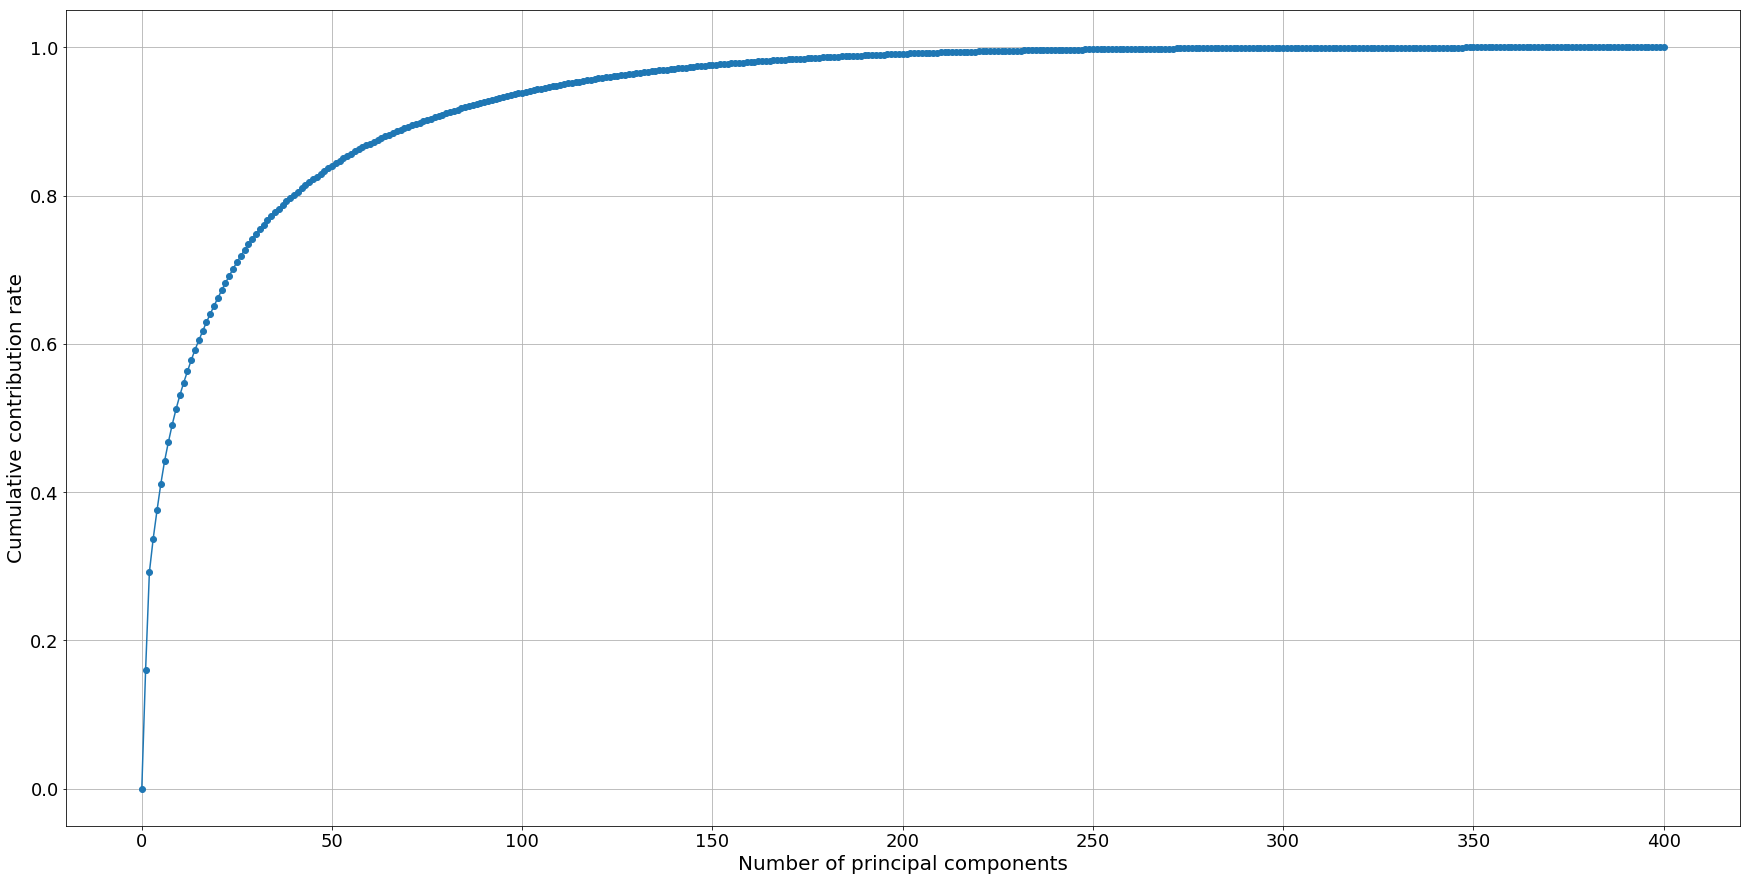

In [8]:
# 累積寄与率の図示
fig = plt.figure(figsize=(30,15))
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components", fontsize = 20)
plt.ylabel("Cumulative contribution rate", fontsize = 20)
plt.tick_params(labelsize=18)
plt.grid()
plt.show();

PC200まででほぼ飽和している。
PC10までを特徴量として使用する。

In [9]:
train_pca_slctd = train_pca[list(train_pca.columns.values[:200])]
test_pca_slctd = test_pca[list(test_pca.columns.values[:200])]

print('train pca selected shape: ', train_pca_slctd.shape)
print('test pca selected shape: ', test_pca_slctd.shape)

display(train_pca_slctd.head())
display(test_pca_slctd.head())

train pca selected shape:  (590540, 200)
test pca selected shape:  (506691, 200)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,-1.073729,-1.823243,-0.639829,0.460614,1.919762,-1.893766,0.327284,0.074420,-0.316645,-0.678161,0.545233,0.271207,-0.418147,0.301034,0.667790,0.173347,0.749782,-0.674180,0.026926,-0.260661,-0.010863,0.217977,-0.218338,-0.006681,0.786743,-0.228715,-0.128933,0.233948,0.154783,0.173857,-0.125447,-0.274768,-0.036972,0.440200,0.209677,0.219611,0.129403,-1.416060,-0.002593,0.165193,...,-0.006529,0.047013,-0.002016,0.017395,-0.052909,0.026269,0.067550,-0.073365,0.005021,0.034986,0.027510,-0.045855,-0.089185,-0.087208,0.024758,0.053815,-0.000790,-0.014288,-0.009016,-0.002684,-0.024031,-0.042635,0.035153,-0.031747,-0.006973,-0.031132,0.038767,0.038244,0.021982,0.072929,0.020323,0.005400,-0.003785,-0.022459,0.008471,0.003210,-0.016185,-0.001110,-0.013689,-0.006777
1,-0.831652,-0.429170,-0.550480,-0.577861,0.609748,-1.287593,0.960423,0.282845,-0.288704,1.467172,-0.391731,0.682633,1.859495,-2.162943,-0.430504,-0.439839,-0.149581,-0.350743,0.388602,-0.415175,0.303567,-0.278476,-0.941792,-0.355532,0.775192,0.531980,-0.971736,1.317615,1.146825,0.856650,-0.527575,-0.138500,-0.144182,0.426621,-0.015448,0.120580,-0.134696,-0.299823,0.041878,-0.399761,...,-0.029171,0.030308,-0.008303,-0.032803,0.007614,0.016703,0.012894,-0.038021,0.015429,0.035930,0.008608,-0.007363,-0.022428,-0.009548,0.005257,-0.005765,0.003981,-0.015196,-0.014003,-0.006923,-0.022571,-0.027072,-0.006172,0.028374,0.021487,-0.021565,0.015568,0.003066,0.003775,0.026421,0.004920,-0.007862,-0.004065,0.002241,-0.004863,0.007393,0.001715,-0.005348,-0.013026,0.001825
2,-1.124709,-1.781320,-0.603011,0.510713,1.825691,-1.722328,0.043661,-0.229008,-0.076372,0.763352,0.348391,0.156103,-0.112284,0.190012,0.458723,0.069305,0.389154,-0.208940,-0.036702,0.108440,0.117276,0.277853,-0.087964,-0.275021,0.398019,-0.545673,0.306549,-0.411124,-0.436868,-0.165947,0.068893,-0.157462,0.078901,0.198872,0.312371,0.059315,-0.010703,0.451915,-0.156110,-0.077334,...,-0.023150,0.040429,-0.009858,-0.036001,-0.005349,-0.030323,-0.011219,-0.025171,0.019380,0.060794,0.014450,-0.003580,-0.036482,0.006126,-0.007176,-0.003650,0.004639,-0.013993,-0.037941,-0.022246,-0.013431,-0.057256,0.027328,0.024309,0.034048,-0.003741,0.021124,0.013869,0.014241,0.013891,-0.000902,-0.008726,0.007928,0.006324,-0.016801,0.013940,-0.019814,0.002556,-0.009370,-0.004551
3,1.705450,-2.727026,-0.452384,1.265470,1.895296,0.761655,2.391838,-1.109377,-1.214088,1.586006,-1.927629,-1.294998,-1.721890,1.540977,1.352547,0.177355,0.294383,1.111283,-1.001065,1.751702,-0.915023,-0.457231,-1.161343,0.383621,-0.209817,-1.094805,-0.326779,0.457187,0.693500,1.137485,0.362448,0.755799,-0.028577,0.205772,0.279954,-0.599226,0.396701,-1.868281,0.272876,1.337049,...,0.117863,-0.000034,0.227138,-0.123117,-0.164037,0.226240,-0.224903,0.076619,-0.149597,0.046535,0.184914,0.031985,-0.104462,0.168842,0.101912,0.101547,-0.174724,0.154118,0.070787,0.333171,-0.025577,-0.047700,0.000645,0.152559,-0.073249,-0.006099,-0.065026,-0.080731,0.132969,0.073912,-0.275670,0.006022,0.171221,0.001243,0.035954,-0.088382,0.150553,-0.006913,-0.163460,-0.037702
4,-0.450949,-1.187035,-0.852142,0.841686,3.223614,-2.834737,-0.036606,0.112396,0.756916,0.690772,1.514572,-0.770432,-0.698218,2.296755,-0.970726,-0.347881,-1.063374,1.723563,0.935119,-0.464737,3.030965,0.290707,1.501779,0.292787,-1.197456,2.281228,-0.094463,2.083800,1.950126,-1.013698,2.556747,-0.271171,-0.020783,-3.168086,-0.972382,-0.448390,0.341659,-0.545961,-0.288034,0.350430,...,-0.128554,0.144683,0.144792,0.140672,-0.093475,0.062050,-0.150326,-0.162719,0.145593,-0.040581,-0.044471,-0.110

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,-1.169342,-2.358964,0.397832,-2.835108,-2.807896,-0.193662,3.102632,2.542141,-2.708325,-2.557897,-0.790630,1.199725,2.828060,-2.658634,-2.002246,0.177767,-2.030660,4.620669,0.150008,1.416889,-0.960813,0.555319,-0.434730,-1.826597,-2.532375,-1.144299,1.390637,-1.673162,-1.842804,-1.546031,0.722239,1.335542,1.463191,-1.349409,0.424606,-0.373731,0.451840,-0.248472,0.297419,-0.664199,...,0.033079,-0.027061,0.023039,0.054865,0.002248,-0.007539,0.044012,0.069902,-0.026469,-0.104848,-0.084317,0.010819,0.036517,0.012863,-0.025076,-0.057901,-0.007887,0.016282,0.040874,0.017210,-0.078225,-0.008178,0.052189,-0.003326,-0.013880,0.020472,-0.018959,-0.036421,-0.029111,-0.005251,0.021268,-0.052160,-0.036238,-0.009074,0.004403,0.004029,-0.049653,-0.029481,-0.005248,0.022121
1,-0.671686,-2.096057,-0.243116,0.027819,0.376339,0.093424,2.152945,0.164160,-1.265245,2.556844,-1.588690,-0.196320,0.071451,0.559904,0.652225,-0.075922,-0.078719,-0.252539,-0.216549,0.412598,0.132478,0.337578,0.376767,0.032353,-0.569633,-0.951420,0.897098,-1.091165,-0.976273,-0.240007,0.404101,0.434285,0.208271,-0.376871,0.617308,-0.243480,0.219585,0.575512,0.110017,-0.494676,...,-0.015645,0.011186,-0.028565,-0.050303,-0.067314,-0.062424,-0.071907,0.002040,0.065497,0.053916,0.026063,-0.035905,-0.053918,0.031733,0.017116,0.000403,0.023971,0.012817,0.017265,0.038932,0.023483,-0.051527,0.044815,-0.002394,0.007427,0.004154,-0.005438,-0.025285,-0.020573,-0.003597,0.020438,-0.006793,-0.013874,-0.031302,-0.018375,-0.009216,-0.027949,-0.008258,-0.021884,0.030642
2,-0.116686,-1.926895,-0.413279,1.702877,0.869752,-0.460388,1.042002,-0.106005,-0.749477,2.394438,-0.532955,0.796497,-1.536887,-0.007163,0.405106,0.073915,0.536899,0.996082,-0.129192,0.341580,-0.639526,-0.579126,-0.009902,-0.591784,-0.092995,-0.137527,-0.203150,-1.467283,-1.071819,1.856806,1.097770,0.247910,1.208699,0.258941,-0.936549,-0.296894,-1.264923,1.895705,1.000762,1.894299,...,-0.027642,0.020662,0.295521,0.189536,0.092922,-0.070252,0.100370,0.033325,0.121355,-0.120937,-0.030235,-0.007658,0.097172,0.107301,-0.106423,-0.046423,-0.091045,0.244623,0.008489,0.168049,-0.188646,-0.007792,0.067641,-0.205598,-0.062922,0.050627,0.104105,0.261675,0.142795,0.051052,0.049607,0.058246,0.088284,-0.240039,-0.102152,-0.026910,0.218929,0.068933,0.132196,-0.285467
3,-1.229684,-2.742653,0.245290,0.584108,-1.241976,2.328542,-4.128820,-1.846632,0.031843,-1.326262,0.467078,0.998726,-1.466431,-0.012808,0.921885,-0.833807,0.851573,0.262704,-0.544505,-1.198185,1.241257,-1.924916,1.463450,0.332582,-1.069452,-1.205909,0.806396,0.492445,-0.602427,-4.137284,-1.950295,2.675034,3.079864,0.395920,0.119183,-0.398844,0.001652,-0.651135,0.309524,1.099203,...,0.001216,0.117415,0.083503,0.155590,-0.006226,-0.012059,0.215062,-0.128712,-0.146962,0.062883,0.269988,-0.029753,-0.098875,-0.236411,0.125020,0.165185,0.000151,-0.119132,-0.027519,-0.032825,0.265772,0.108942,-0.033443,-0.130765,-0.003358,0.026625,0.013859,0.069502,0.062417,-0.250661,-0.014065,0.048109,0.051906,0.100715,-0.059507,-0.093419,-0.047716,0.004418,0.052323,-0.008582
4,-0.639220,-2.788833,0.277807,0.733136,-0.293460,4.170230,-1.712690,-1.946286,1.405143,-1.645769,0.183738,-1.534015,-1.035426,0.176919,0.249672,0.015877,-0.575776,1.281437,-0.597730,0.951647,0.440227,-0.100143,-3.035406,0.359241,1.275754,1.686590,-0.034279,0.528051,-1.765167,-2.043753,-0.163991,-0.536912,-1.048395,-0.076304,-0.432462,1.169075,0.103493,-2.200357,-0.105594,0.226288,...,-0.047292,0.115549,0.026046,0.125362,-0.013480,-0.027164,-0.061502,0.079892,0.019899,0.011542,0.186461,-0.05352